<a href="https://colab.research.google.com/github/cinsanchez/cs-77715-datascience1/blob/main/77715_CintiaSanchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análisis Skincare**

### Dataset seleccionado:
* [Sephora Products and Skincare Reviews](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews)

### Descripción del Dataset:
* Este dataset contiene información sobre más de 8.000 productos de belleza de Sephora (nombre, marca, precio, ingredientes, calificación, características, etc.) y alrededor de 1 millón de reseñas de usuarios de la categoría Skincare.

# Contexto y Objetivo del Proyecto

Este proyecto tiene como objetivo analizar la satisfacción del cliente dentro de la categoría de skincare de Sephora, utilizando información sobre precios, calificaciones y reseñas disponibles en el catálogo online de la marca.

El propósito principal es identificar los factores que más influyen en que un producto obtenga una alta valoración y comprender cómo se relacionan variables como el precio, la popularidad (número de reseñas) y la calificación otorgada por los usuarios.

Para abordar esta problemática, se combinan dos enfoques:

**1. Aprendizaje supervisado (clasificación):**  
Se utiliza una regresión logística para predecir si un producto tendrá un rating alto (≥4), permitiendo analizar la influencia de las variables seleccionadas en la satisfacción del cliente.

**2. Aprendizaje no supervisado (clustering):**  
Mediante K-Means se segmentan los productos en grupos basados en su rango de precios, con el fin de identificar la estructura natural del mercado dentro del catálogo de skincare.

Este enfoque permite responder preguntas clave como:

- ¿Qué variables influyen más en la satisfacción del cliente?  
- ¿Existe relación entre precio, rating y popularidad?  
- ¿Es posible predecir si un producto será bien valorado?  
- ¿Qué segmentos de precios se identifican dentro de los productos skincare?

# **Diccionario de datos**

| **Columna**          | **Descripción**                                 |
| -------------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
|1. `product_id`         | Identificador único del producto en el sitio.                                                                                              |
|2. `product_name`       | Nombre completo del producto.                                                                                                              |
|3. `brand_id`           | Identificador único de la marca del producto en el sitio.                                                                                  |
|4. `brand_name`         | Nombre completo de la marca del producto.                                                                                                  |
|5. `loves_count`        | Número de personas que han marcado el producto como favorito.                                                                              |
|6. `rating`             | Calificación promedio del producto basada en reseñas de usuarios.                                                                          |
|7. `reviews`            | Número total de reseñas de usuarios para el producto.                                                                                      |
|8. `size`               | Tamaño del producto (puede estar en oz, ml, g, paquetes u otras unidades según el tipo).                                                   |
|9. `variation_type`     | Tipo de variación del producto (Ejemplo: Tamaño, Color).                                                                               |
|10. `variation_value`    | Valor específico de la variación.                                                                       |
|11. `variation_desc`     | Descripción adicional de la variación.                                                                 |
|12. `ingredients`        | Lista de ingredientes del producto. |
|13. `price_usd`          | Precio del producto en dólares estadounidenses.                                                                                            |
|14. `value_price_usd`    | Precio de referencia o ahorro potencial mostrado junto al precio regular.                                                                  |
|15. `sale_price_usd`     | Precio del producto en oferta (USD).                                                                                                       |
|16. `limited_edition`    | Indica si el producto es de edición limitada (`1` = sí, `0` = no).                                                                         |
|17. `new`                | Indica si el producto es nuevo (`1` = sí, `0` = no).                                                                                       |
|18. `online_only`        | Indica si el producto se vende solo en línea (`1` = sí, `0` = no).                                                                         |
|19. `out_of_stock`       | Indica si el producto está agotado (`1` = sí, `0` = no).                                                                                   |
|20. `sephora_exclusive`  | Indica si el producto es exclusivo de Sephora (`1` = sí, `0` = no).                                                                        |
|21. `highlights`         | Lista de etiquetas o características destacadas del producto (Ejemplo: `[‘Vegano’, ‘Acabado Mate’]`).                                  |
|22. `primary_category`   | Primera categoría en la jerarquía.                                                                                            |
|23. `secondary_category` | Segunda categoría en la jerarquía.                                                                                                         |
|24. `tertiary_category`  | Tercera categoría en la jerarquía.                                                                                                         |
|25. `child_count`        | Número de variaciones disponibles del producto.                                                                                            |
|26. `child_max_price`    | Precio más alto entre las variaciones del producto.                                                                                        |
|27. `child_min_price`    | Precio más bajo entre las variaciones del producto.                                                                                        |


# **Contexto comercial**

Sephora es una de las principales cadenas minoristas de productos de belleza y skincare a nivel global. Su catálogo online incluye miles de productos de distintas marcas, con información sobre precios, valoraciones, ingredientes, y reseñas de clientes.

Entender qué factores influyen en la satisfacción del cliente, la popularidad de los productos y las preferencias de compra resulta clave para optimizar las estrategias comerciales, de marketing y de producto.

## Definición del Problema

Identificar qué variables del producto (como precio, calificación y cantidad de reseñas) explican mejor la satisfacción del cliente y el desempeño comercial dentro de la categoría skincare.

Esto permitirá obtener insights sobre las preferencias de los consumidores y orientar decisiones de producto.

## Objetivo general

**Identificar los factores que más influyen en la satisfacción del cliente**, evaluando la relación entre el **precio**, la **calificación (rating)** y la **popularidad (cantidad de reseñas)** de los productos y del usuario.

## Hipótesis a evaluar

1. **Los productos con más reseñas presentan calificaciones más altas** (popularidad).  
2. **Los productos con ratings más altos tienden a recibir más reseñas**, como indicador de mayor demanda.  
3. **Las marcas premium (con precios más altos) obtienen mejores ratings** que las marcas económicas.  
4. **Las personas más jóvenes tienden a dar calificaciones más altas**, reflejando una mayor satisfacción con resultados inmediatos.

### Tratamiento de valores nulos

Durante la revisión del dataset se identificaron valores nulos principalmente en la columna `reviews` (cantidad de reseñas). Para evitar eliminar productos completos —ya que esto implicaría pérdida innecesaria de información— se optó por imputar los valores faltantes utilizando la **mediana** de la variable.

Se eligió la mediana porque:

- Es robusta ante outliers, presentes tanto en precios como en número de reseñas.
- Preserva la forma general de la distribución.
- Evita que valores extremos distorsionen el promedio.

Dado que los valores nulos representaban aproximadamente un 3% del total, se consideró adecuado imputarlos en lugar de eliminar filas. Esto permitió mantener la integridad del dataset para el posterior modelado supervisado y no supervisado.


# **Importación de data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Archivos
path_skincare = '/content/drive/MyDrive/Coderhouse_DataScience_77715/DataSet-Proyecto/product_info.csv'

skincare_df = pd.read_csv(path_skincare)

Mounted at /content/drive


In [2]:
skincare_df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [3]:
skincare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [4]:
skincare_df.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


In [5]:
product_count = skincare_df['product_id'].count()

print("Total de productos:", product_count)

Total de productos: 8494


In [6]:
brand_count = skincare_df['brand_id'].count()

print("Total de marcas registradas:", product_count)

Total de marcas registradas: 8494


# Distribución de Ratings
La mayoría de los productos se encuentran calificados entre 4 y 5 estrellas, evidenciando un sesgo positivo habitual en plataformas de reseñas de cosmética. Esta concentración limita la variabilidad de la variable objetivo y explica por qué los modelos supervisados pueden tener dificultades para diferenciar clases.

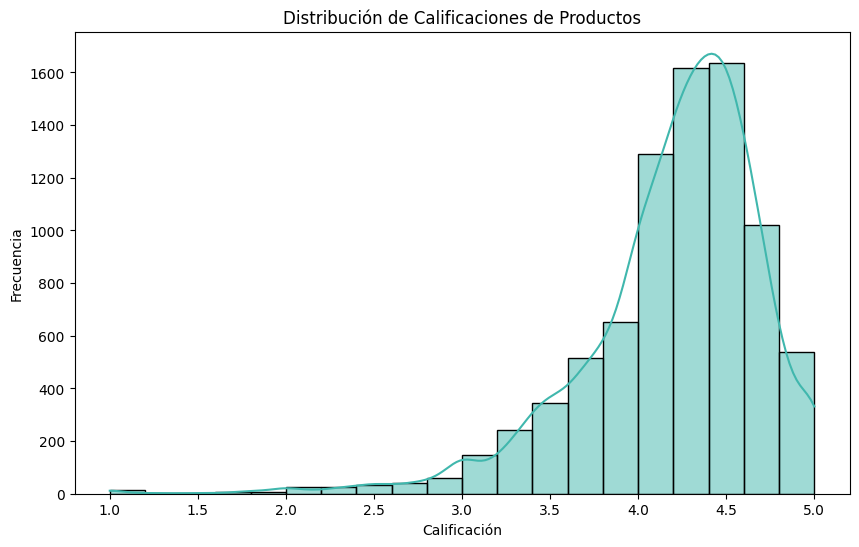

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(skincare_df['rating'].dropna(), bins=20, kde=True, color=sns.color_palette('mako')[4])
plt.title('Distribución de Calificaciones de Productos')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

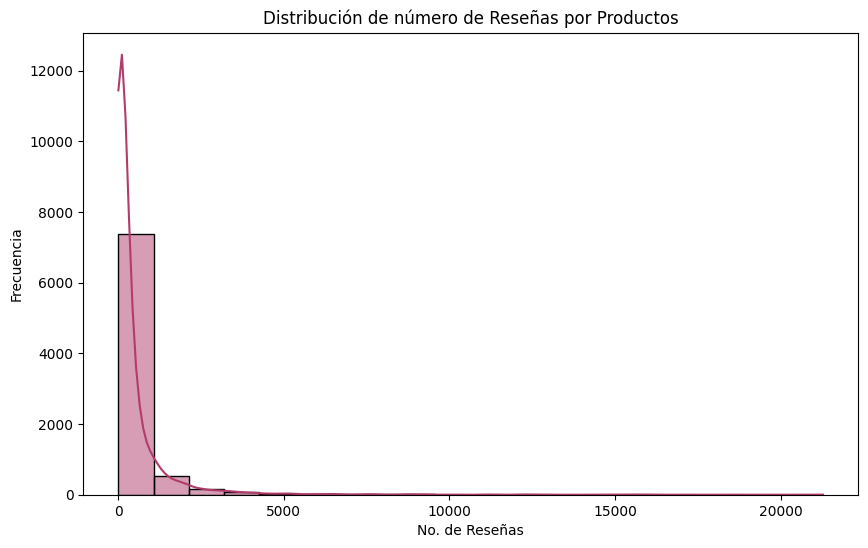

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(skincare_df['reviews'].dropna(), bins=20, kde=True, color=sns.color_palette('flare')[3])
plt.title('Distribución de número de Reseñas por Productos')
plt.xlabel('No. de Reseñas')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de Precios de Productos

La distribución de precios muestra una fuerte concentración entre los USD 5 y USD 50, lo que indica que la mayoría del catálogo corresponde a productos accesibles o de gama inicial. A partir de los USD 150 se observan precios mucho menos frecuentes, correspondientes a productos premium o de lujo. Esto genera una distribución sesgada a la derecha debido a la presencia de valores extremadamente altos.


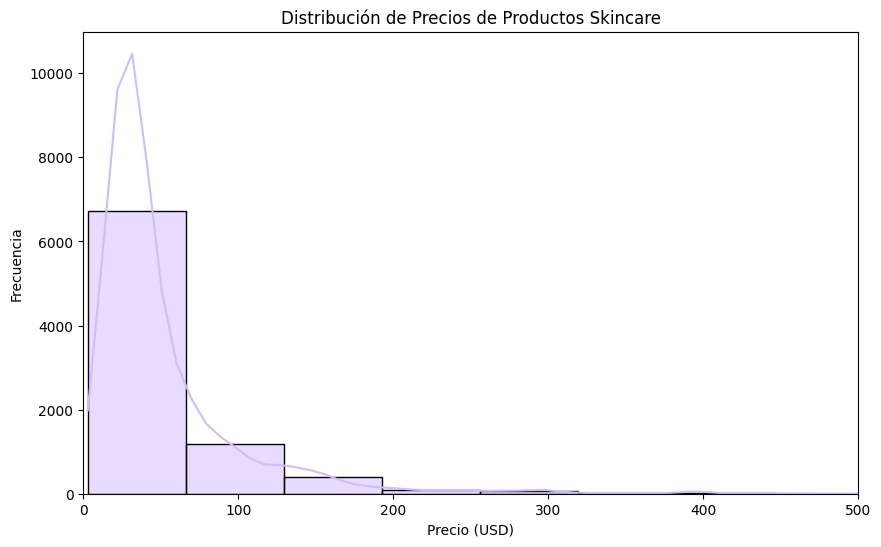

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=skincare_df, x='price_usd', bins=30, kde=True, color=sns.color_palette('pastel')[4])
plt.title('Distribución de Precios de Productos Skincare')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.xlim(0, 500)
plt.show()

# Relación entre Precio y Calificación de Productos Skincare

No se observa una relación lineal clara entre el precio y la calificación. Los productos premium no necesariamente obtienen mejores valoraciones que los económicos. Esto sugiere que la percepción de calidad del consumidor no depende únicamente del precio, sino de otros factores como la efectividad, la marca o la experiencia de uso.

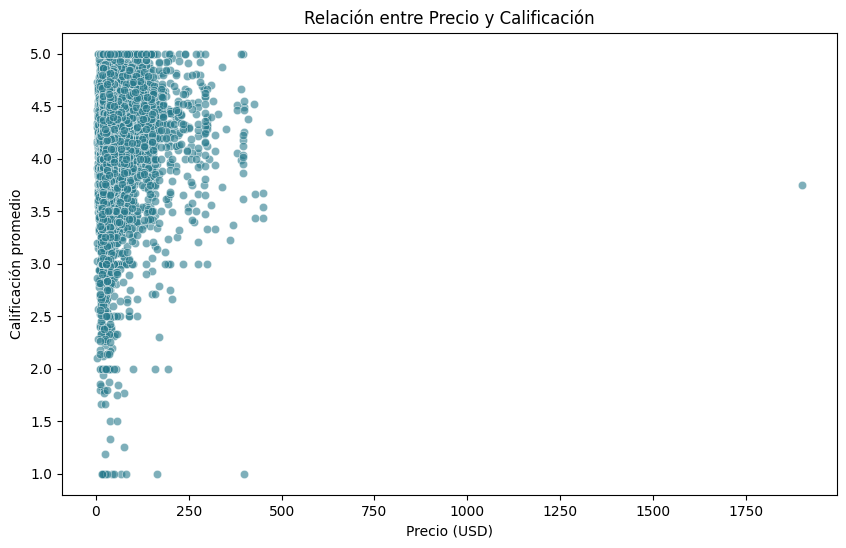

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=skincare_df, x='price_usd', y='rating', alpha=0.6, color=sns.color_palette('crest')[3])
plt.title('Relación entre Precio y Calificación')
plt.xlabel('Precio (USD)')
plt.ylabel('Calificación promedio')
plt.show()

**Top 10 marcas con mejor calificación promedio**

Las diez marcas con mayor presencia en el catálogo reflejan la diversidad del mercado skincare. Estas marcas suelen ofrecer líneas completas de productos o tener alta visibilidad en el mercado. Su amplia representación también puede estar asociada a mayor interacción por parte de los usuarios en forma de reseñas.


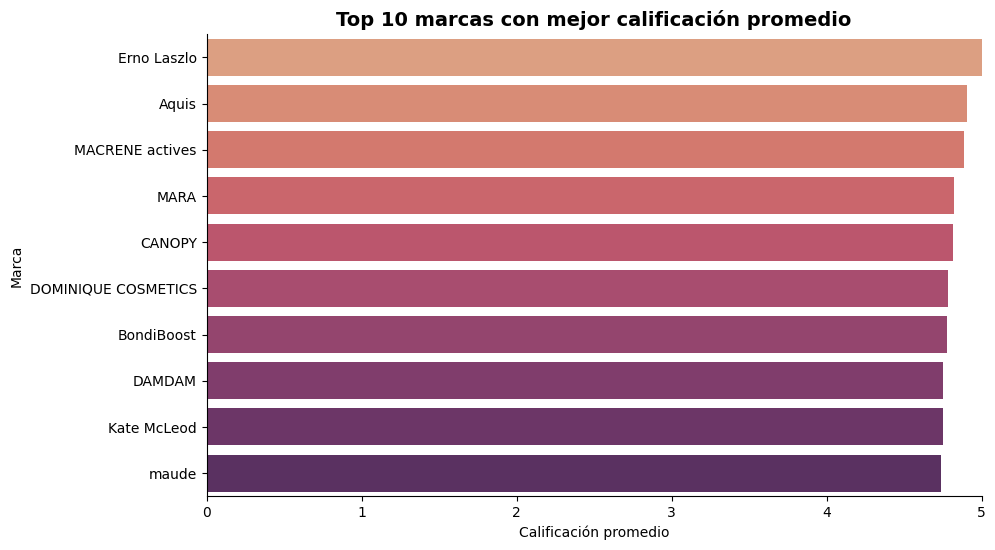

In [ ]:
top_brands = (skincare_df.groupby('brand_name')['rating']
              .mean()
              .sort_values(ascending=False)
              .head(10))

plt.figure(figsize=(10,6))
sns.barplot(
    hue=top_brands.index,
    x=top_brands.values,
    y=top_brands.index,
    palette='flare'
)

plt.title('Top 10 marcas con mejor calificación promedio', fontsize=14, weight='bold')
plt.xlabel('Calificación promedio')
plt.ylabel('Marca')
plt.xlim(0, 5)
sns.despine()
plt.show()

In [ ]:
base['price_category'].value_counts(dropna=False)

,count
price_category,
Bajo,5854
Medio,2011
Alto,350
Premium,1


**Rating promedio por marca y categoría de precio**

El gráfico muestra la calificación promedio de las seis marcas principales de skincare, segmentadas según rangos de precio calculados a partir de los cuartiles de distribución del dataset.  
Esta segmentación equilibrada permite comparar el desempeño relativo de las marcas en diferentes niveles de precio.  
Se observa que las calificaciones se mantienen estables entre los grupos, lo que sugiere que el nivel de satisfacción del cliente no depende únicamente del valor monetario del producto.

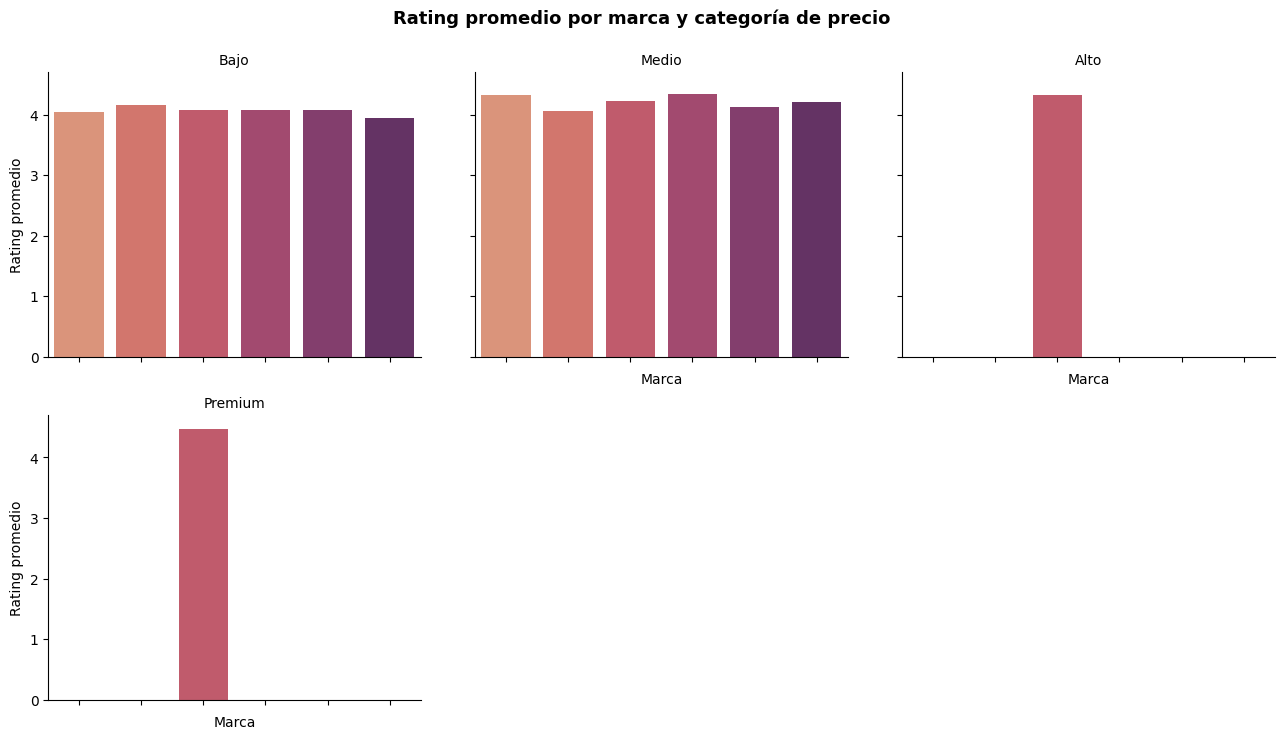

In [ ]:
base = skincare_df[['brand_name','product_id','price_usd','rating']].dropna().drop_duplicates()

base['price_category'] = pd.cut(
    base['price_usd'],
    bins=[0,40,90,150,500],
    labels=['Bajo','Medio','Alto','Premium'],
    include_lowest=True
)

top_brands = (base.groupby('brand_name')['product_id']
              .nunique().sort_values(ascending=False)
              .head(6).index)
plot_df = base[base['brand_name'].isin(top_brands)]

g = sns.catplot(
    data=plot_df,
    kind='bar',
    x='brand_name', y='rating',
    col='price_category',
    estimator='mean', errorbar=None,
    hue='brand_name',
    palette='flare',
    legend=False,
    col_wrap=3, height=3.6, aspect=1.2
)
g.set_xticklabels(rotation=30, ha='right')
g.set_axis_labels('Marca', 'Rating promedio')
g.set_titles('{col_name}')
plt.suptitle('Rating promedio por marca y categoría de precio', y=1.04, fontsize=13, weight='bold')
plt.show()

g.set_xticklabels(rotation=25, ha='right')
sns.set_palette('flare')


**Análisis de outliers en la variable `price_usd`:**  

El gráfico boxplot muestra la distribución del precio de los productos de skincare, evidenciando la presencia de valores extremos muy por encima del rango central.  
Mediante el método del rango intercuartílico (IQR), se identificaron los productos cuyos precios superan 1.5 veces la amplitud entre los cuartiles Q1 y Q3.  
Estos valores corresponden a productos de lujo o ediciones especiales, y aunque representan una fracción muy pequeña del total, podrían sesgar los análisis de promedio o proyección de precios si no se tratan adecuadamente.


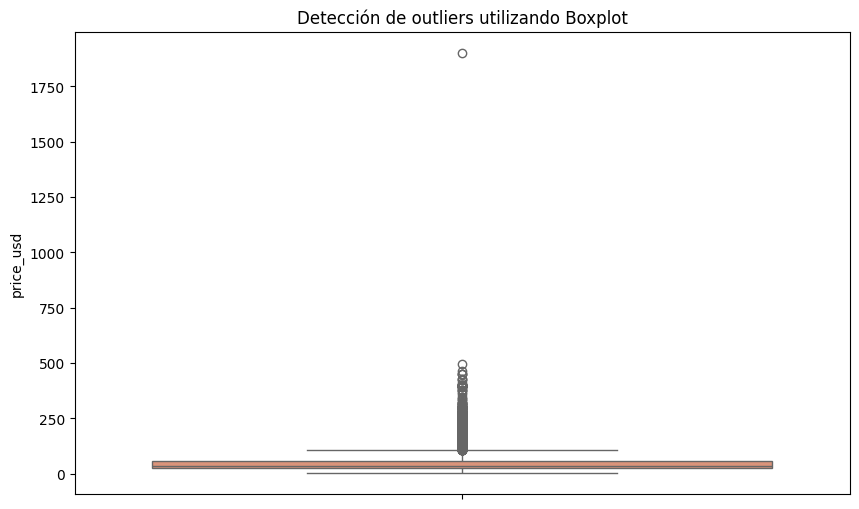

In [ ]:
# Para identificar los outliers con Boxplot
plt.figure(figsize = (10,6))
sns.boxplot(data=skincare_df, y='price_usd')
plt.title('Detección de outliers utilizando Boxplot')
plt.show()


In [ ]:
# Outliers con cuartiles
# Variable para analizar el precio
col = 'price_usd'

# Para calcular los cuartiles y rango intercuartílico
Q1 = skincare_df[col].quantile(0.25)
Q3 = skincare_df[col].quantile(0.75)
IQR = Q3 - Q1

# Se definen los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Para identificar los Outliers
outliers = skincare_df[(skincare_df[col] < lower_bound) | (skincare_df[col] > upper_bound)]
print(f"Cantidad de outliers en {col}: {len(outliers)}")

# Para mostrar ejemplos
outliers[[col, 'brand_name', 'product_name']].head()

Cantidad de outliers en price_usd: 845


,price_usd,brand_name,product_name
1,195.0,19-69,La Habana Eau de Parfum
2,195.0,19-69,Rainbow Bar Eau de Parfum
3,195.0,19-69,Kasbah Eau de Parfum
4,195.0,19-69,Purple Haze Eau de Parfum
7,195.0,19-69,Invisible Post Eau de Parfum


**Análisis de Outliers a través de métodod IQR**

El método del rango intercuartílico (IQR) permite identificar valores atípicos al calcular el rango central de los datos (entre los percentiles 25 % y 75 %).  
En este caso, los productos con precios superiores a 145 USD se consideran outliers, ya que se alejan del comportamiento típico del mercado, concentrado principalmente en precios inferiores a 100 USD.  
Estos valores corresponden a productos premium o de lujo dentro del catálogo de Sephora.


# **Regresión Logística**

¿Podemos predecir si un producto de skincare será bien valorado (rating ≥ 4) en función de su precio, marca y popularidad?

Se detectaron 278 valores nulos en la columna `reviews` (equivalente al 3% del total).  

Dado que se trata de una variable numérica y la proporción de datos faltantes es baja, se decidió imputar los valores faltantes utilizando la mediana, preservando así la consistencia del dataset para el modelo de regresión logística.

In [ ]:
features = features.copy()
features['price_usd'] = features['price_usd'].fillna(features['price_usd'].median())
features['reviews'] = features['reviews'].fillna(features['reviews'].median())

In [ ]:
features.info()
features.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price_usd   8494 non-null   float64
 1   reviews     8494 non-null   float64
 2   brand_name  8494 non-null   object 
dtypes: float64(2), object(1)
memory usage: 199.2+ KB


,0
price_usd,0
reviews,0
brand_name,0


# **Entrenamiento de modelo**

Se decidió mantener el DataFrame `features` como base principal del modelo, ya que contiene las columnas de precio y número de reseñas sin valores nulos.  
Esto evita errores de entrenamiento y garantiza consistencia entre las variables predictoras y la variable objetivo `high_rating`.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Columnas
X = features[['price_usd', 'reviews']].copy()
y = skincare_df.loc[X.index, 'high_rating']

##Entrenamiento - pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##Entrenando el modelo
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)

##Predicciones
y_pred = log_model.predict(X_test)

# Resultados y métricas
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, digits=3))

Accuracy: 0.496

Matriz de confusión:
 [[380  98]
 [758 463]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0      0.334     0.795     0.470       478
           1      0.825     0.379     0.520      1221

    accuracy                          0.496      1699
   macro avg      0.580     0.587     0.495      1699
weighted avg      0.687     0.496     0.506      1699



### Interpretación del Modelo de Regresión Logística

El modelo obtuvo un accuracy cercano al 50%, lo cual indica que acierta aproximadamente la mitad de las predicciones realizadas. Aunque este desempeño es moderado, debe interpretarse considerando que la variable objetivo (`high_rating`) está desbalanceada: la mayoría de los productos presenta ratings altos.

La matriz de confusión muestra que el modelo identifica relativamente bien los productos con rating bajo, pero tiene dificultades para predecir con precisión los productos de rating alto.

En términos prácticos, el modelo es útil para analizar qué variables tienen influencia, pero su capacidad predictiva se ve limitada por la falta de variabilidad en los ratings.


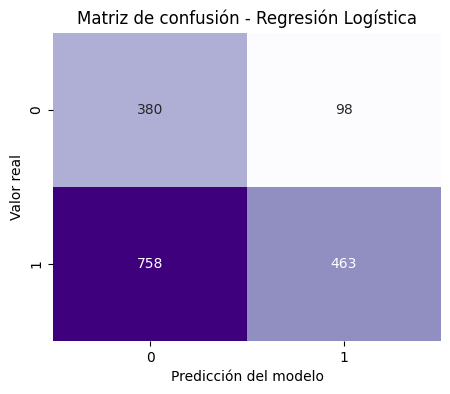

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Matriz de confusión - Regresión Logística')
plt.xlabel('Predicción del modelo')
plt.ylabel('Valor real')
plt.show()

### Matriz de confusión

La matriz de confusión permite visualizar el desempeño del modelo mostrando los aciertos y errores en la clasificación.

En este caso, el modelo acierta en el 49,6% de los casos, siendo más efectivo al identificar productos con baja calificación (recall de 0.79) que aquellos con alta calificación (recall de 0.37).

El análisis evidencia que, aunque el modelo logró aprender a distinguir ambas clases tras aplicar el balanceo de pesos, todavía presenta dificultades para identificar correctamente los productos con alta calificación, lo que sugiere la necesidad de incorporar más variables predictoras o ajustar el modelo.

## Interpretación del Clustering con K-Means

El algoritmo K-Means identificó tres grupos naturales de productos según su precio:

**Cluster 0 — Productos económicos:**  
Valores entre USD 5 y 40. Representan la mayor parte del catálogo, lo que indica que Sephora posee una oferta amplia de productos accesibles.

**Cluster 1 — Productos de gama media:**  
Precios entre USD 50 y 200. Incluye productos especializados y marcas reconocidas. Es un segmento intermedio en tamaño.

**Cluster 2 — Productos premium:**  
Precios superiores a USD 200 y presencia de outliers. Representa un nicho más pequeño, enfocado en productos de lujo.

Esta segmentación evidencia la estructura natural del mercado dentro del catálogo skincare.


1.   Elemento de la lista
2.   Elemento de la lista



In [8]:
price_df = skincare_df[['price_usd']].dropna().copy()

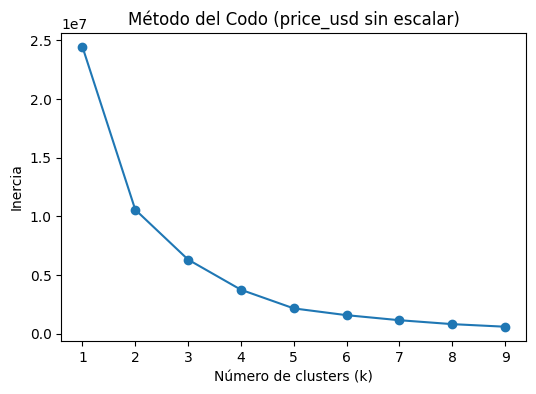

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(price_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,10), inertia, marker='o')
plt.title('Método del Codo (price_usd sin escalar)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(price_df)

price_df['cluster'] = kmeans.labels_

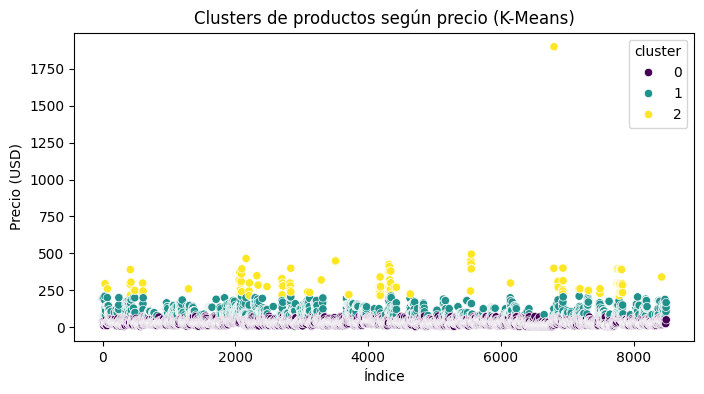

In [12]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.scatterplot(
    x=price_df.index,
    y=price_df['price_usd'],
    hue=price_df['cluster'],
    palette='viridis'
)
plt.title('Clusters de productos según precio (K-Means)')
plt.xlabel('Índice')
plt.ylabel('Precio (USD)')
plt.show()

/tmp/ipython-input-4080194317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=price_df, x='cluster', y='price_usd', palette='viridis')


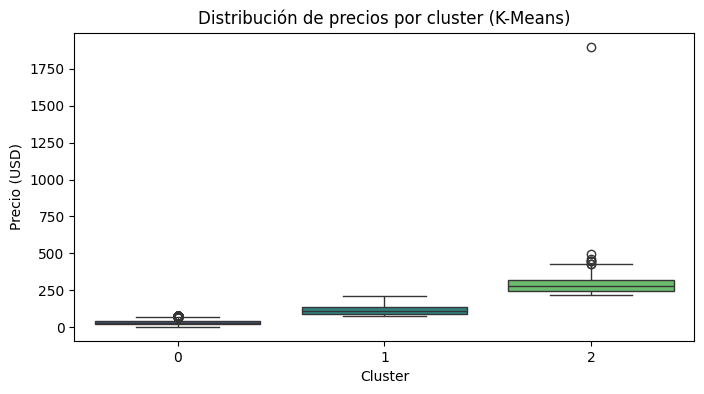

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(data=price_df, x='cluster', y='price_usd', palette='viridis')
plt.title('Distribución de precios por cluster (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Precio (USD)')
plt.show()

El algoritmo K-Means identificó tres segmentos claros de productos según su precio:

**Cluster 0 – Productos económicos:**  
Concentra la mayoría de los productos, con precios entre USD 5 y 40. Representa la gama accesible del catálogo.

**Cluster 1 – Gama media:**  
Agrupa productos entre USD 50 y 200. Incluye marcas reconocidas y productos especializados.

**Cluster 2 – Segmento premium:**  
Contiene precios elevados, superando los USD 200 e incluso llegando a valores muy altos. Corresponde a productos de lujo o de nicho.

Esta segmentación permite visualizar la estructura natural del mercado skincare y entender mejor cómo se distribuyen los precios en Sephora.

## Conclusiones Finales del Proyecto

El análisis permitió comprender mejor la estructura del catálogo de productos skincare en Sephora y los factores asociados a la satisfacción del cliente.

En primer lugar, la exploración inicial evidenció que la mayoría de los productos presentan calificaciones altas (≥4), lo cual introduce un sesgo positivo natural en el dataset. No se observó una relación clara entre precio y rating, mientras que la cantidad de reseñas mostró una asociación más fuerte con la valoración del producto, probablemente por su vinculación con la popularidad.

La regresión logística permitió predecir si un producto sería bien valorado, aunque con un desempeño limitado debido al desbalance de clases. A pesar de esto, el modelo aportó una lectura valiosa de la influencia relativa de cada variable: el precio no mostró un efecto significativo en la predicción, mientras que las reseñas tuvieron mayor relevancia.

Por otro lado, el análisis no supervisado mediante K-Means permitió identificar tres segmentos naturales de precios dentro del catálogo: productos económicos, productos de gama media y productos premium. Esta segmentación aporta información útil sobre la diversidad del mercado y el posicionamiento de los productos.

### Insights principales:
- El precio no determina la satisfacción del cliente.  
- Los productos con más reseñas tienden a tener mejores valoraciones.  
- La distribución de precio forma tres categorías claramente diferenciadas.  
- El catálogo está fuertemente concentrado en productos accesibles y con alta valoración.

### Limitaciones del análisis:
- El rating presenta poco rango de variación, afectando el poder predictivo.  
- Solo se utilizaron dos variables numéricas en el modelo supervisado.  
- No se incluyeron análisis de texto de reseñas ni características del producto.

### Líneas futuras de mejora:
- Aplicar modelos más complejos como Random Forest.  
- Incorporar múltiples variables en el clustering para segmentaciones más robustas.  

En conjunto, los resultados permiten obtener una visión clara del comportamiento del mercado skincare en Sephora y de los factores que influyen en la satisfacción del cliente.